<a href="https://www.kaggle.com/code/abhikuks/function-transformer-in-depth-understanding?scriptVersionId=99854766" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Function Transformers
> Basically, these are mathematical transformations that we implement on columns to make data normally distributed.
What is so special about normal probability distribution? Why do so many data science and machine learning articles revolve around normal probability distribution?

***A Little Background First***

- Firstly, the most important point to note is that the normal distribution is also known as the Gaussian distribution.
- Secondly, it is named after the genius of Carl Friedrich Gauss.
- Lastly, an important point to note is that simple predictive models are usually the most used models. This is due to the fact that they can be explained and are well-understood. Now to add to this point; normal distribution is simple and hence its simplicity makes it extremely popular.

***What Is Normal Distribution?***

A normal distribution is a distribution that is solely dependent on two parameters of the data set: the mean and the standard deviation of the sample.

> - Mean — This is the average value of all the points in the sample that is computed by summing the values and then dividing by the total number of the values in a sample.
> - Standard Deviation — This indicates how much the data set deviates from the mean of the sample.

    This characteristic of the distribution makes it extremely simple for statisticians and hence any variable that exhibits normal distribution is feasible to be forecasted with higher accuracy. Essentially, it can help in simplifying the model.
    
***How to find if the data is normally distributed or not ?***

- we can use seaborn's sns.kdeplot
- pandas pd.skew() and pd.kurt() to check skewness and kurtosis of distribution.
- QQ Plot 

## Function Transformer has different types to make data more normally distributed
> 1. ***Log transformer*** 
    - mostly used on right-skewed data.
    - It cannot be applied to negative data as we can't calculate the log of negative numbers
    - It helps in the accuracy of linear models as it changes the additive scale to multiplicates scale.

> 2. ***Reciprocal*** 
    - It is mostly used when we need to change small values to big values and vice versa

> 3. ***Square***
    - Mostly used in left-skewed data

> 4. ***Squareroot***

> 5. ***Custom Transformation*** 
    - We can make our own transformations


In [1]:
# let's import some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
# only going to use 'Age', 'Fare' ,'Survived'
df= pd.read_csv('../input/titanic/train.csv' , usecols=['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
216,1,27.0,7.9250
103,0,33.0,8.6542
118,0,24.0,247.5208
818,0,43.0,6.4500
126,0,NaN,7.7500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.fillna(df["Age"].mean(), inplace=True)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
df.isnull().sum() # now no missing values

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size = 0.2,random_state=42)

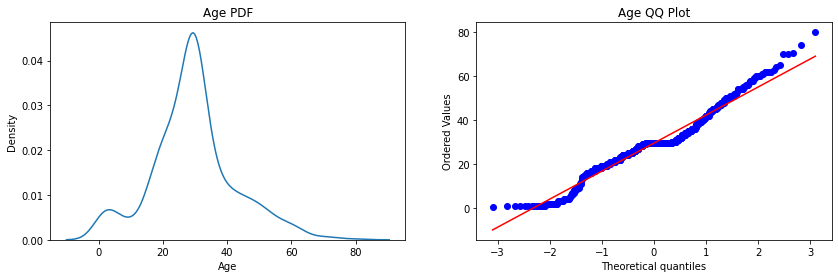

In [9]:
# Now we'll have a look whether Age and fare are normally distributed or not

fig,ax = plt.subplots(1,2 ,figsize= (14,4))
ax[0].set_title('Age PDF')
sns.kdeplot(X_train['Age'] ,ax = ax[0])


stats.probplot(X_train['Age'] ,dist = 'norm' , plot =plt)
ax[1].set_title("Age QQ Plot")

plt.show()

***It's not exactly normal data but it is kind of normal , hope you can understand . lol***
- As most of the times in QQ plot the data is aligned / sticked to linear relationship ; from some parts it's deviating a bit but not much

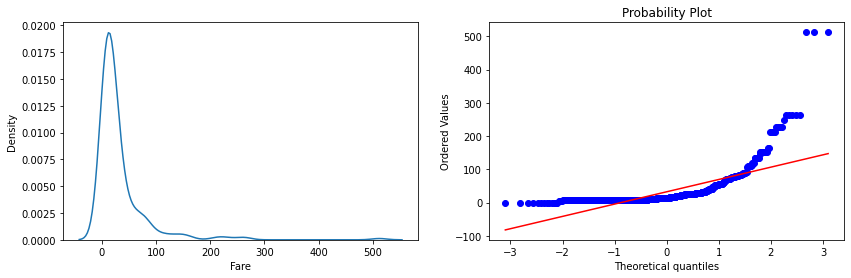

In [10]:
fig , axes = plt.subplots(1,2 , figsize = (14,4))

sns.kdeplot(X_train['Fare'] , ax = axes[0])
ax[0].set_title('Fare pdf')

stats.probplot(X_train['Fare'] , dist = 'norm' , plot = plt)
ax[1].set_title('Fare QQ plot')
plt.show()

***This is rightly skewed data and if you have done some data analysis , you can notice that some people put crazt money on buying the tickets , I mean why but it paid off eventually , as most people who lived the titanic were from Pclass 1 which gave the mostly expensive***
- So always buy the best tickets ,haha{pardon my humour}
- But now we know it's rightly skewed , so we will use the ***Log transformer***.
- Before doing this , I want to see how linear and tree models will react.

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR : ", accuracy_score(y_test ,y_pred)) # used .round()  error Can't handle mix of binary and continuous target
print("Accuracy DT : ", accuracy_score(y_test ,y_pred2))

Accuracy LR :  0.6480446927374302
Accuracy DT :  0.6759776536312849


In [13]:
 trf1 = FunctionTransformer(func = np.log1p)

In [14]:
X_train_transformed =trf1.fit_transform(X_train) 
X_test_transformed = trf1.fit_transform(X_test)

In [15]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 =clf2.predict(X_test_transformed)

print('Accuracy LR: ',accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred2))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6759776536312849


***Now we can see that the accuracy score of Logistic Regression improved after log transform but Decision tree didn't got affected.Sometimes, after seeing this much change I feel like doing crossval score to check the integrity of the model.***

In [16]:
X_transformed = trf1.fit_transform(X)

In [17]:
print("Accuracy LR",np.mean(cross_val_score(clf,X_transformed , y ,scoring='accuracy',cv=10)))
print("Accuracy DT",np.mean(cross_val_score(clf2,X_transformed , y ,scoring='accuracy',cv=10)))

Accuracy LR 0.678027465667915
Accuracy DT 0.6621972534332087


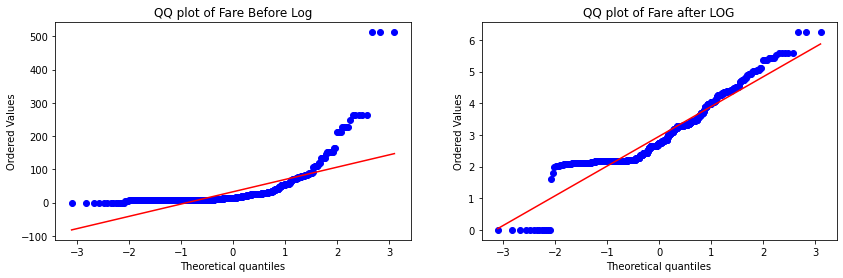

In [18]:
fig  , axes = plt.subplots(1,2 , figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist = 'norm' , plot = plt)
plt.title("QQ plot of Fare after LOG")
plt.show()

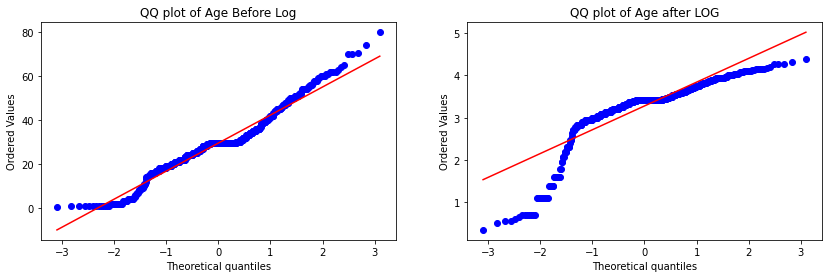

In [19]:
fig  , axes = plt.subplots(1,2 , figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist = 'norm' , plot = plt)
plt.title("QQ plot of Age after LOG")
plt.show()

***So now we can see that log transform comes out better for Fare as it starts to follow the linear relationship and not for Age as in age now the data is deviating from the linear line in QQ plot. So now brain thought lets use column transformer and do the log transformation only on Fare.***

In [20]:
trf2 = ColumnTransformer([
    ('log' ,FunctionTransformer(np.log1p),['Fare'])
] , remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train) 
X_test_transformed2 = trf2.transform(X_test)

In [21]:
clf.fit(X_train_transformed2 ,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR : ",accuracy_score(y_test ,y_pred))
print("Accuracy DT : " ,accuracy_score(y_test,y_pred2))

Accuracy LR :  0.6703910614525139
Accuracy DT :  0.6759776536312849


### Observation
- ***We can see that the model accuracy of Logistic regression imporved after normally distributing the data of fare column and age column is already somewhat normally distributed.***
- ***Decision tree does not gives a shit about normalizing the data  , it remains same throughout.***

# Let's talk about other tranformations

In [22]:
# Should have done this earlier ,haha
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('QQ plot of Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('QQ plot of Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


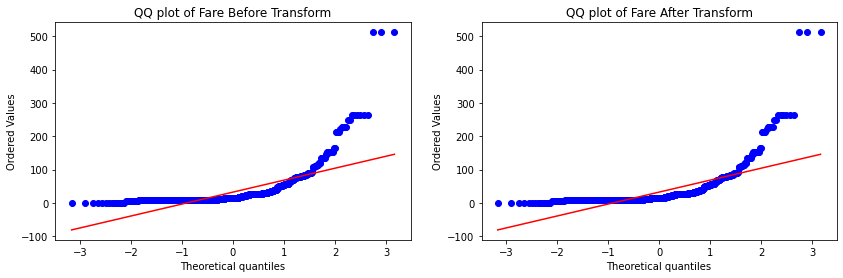

In [23]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


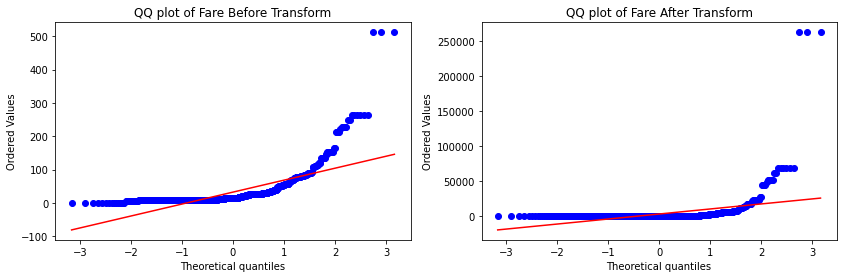

In [24]:
apply_transform(lambda x :x**2) # Squared transform is not performing better , it is mostly used on left skewed data

Accuracy 0.39843945068664166


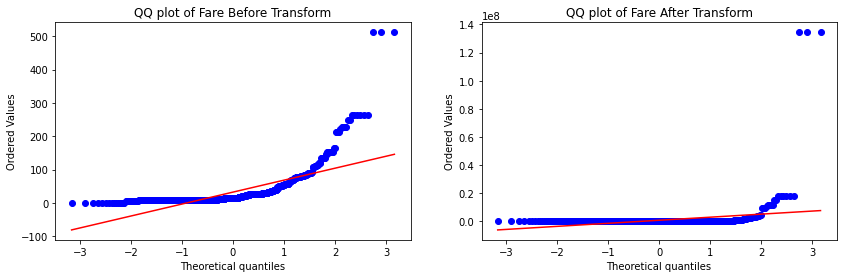

In [25]:
apply_transform(lambda x :x**3)

Accuracy 0.6589013732833957


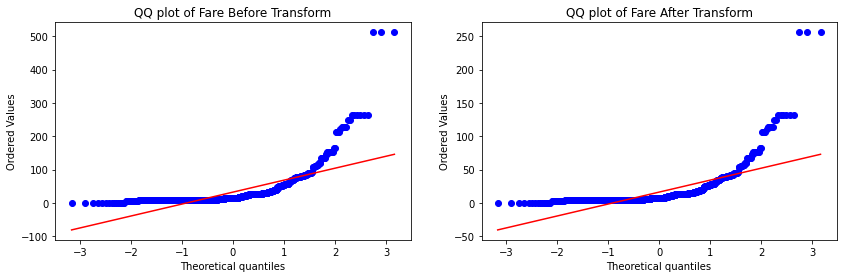

In [26]:
apply_transform(lambda x :x**1/2) # sqrt

Accuracy 0.61729088639201


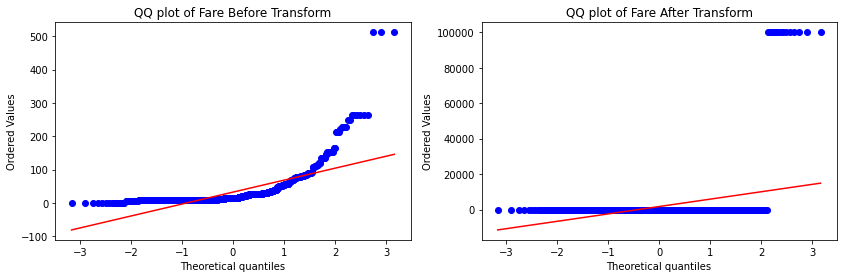

In [27]:
apply_transform(lambda x: 1/(x+0.00001)) #reciprocal

Accuracy 0.616167290886392


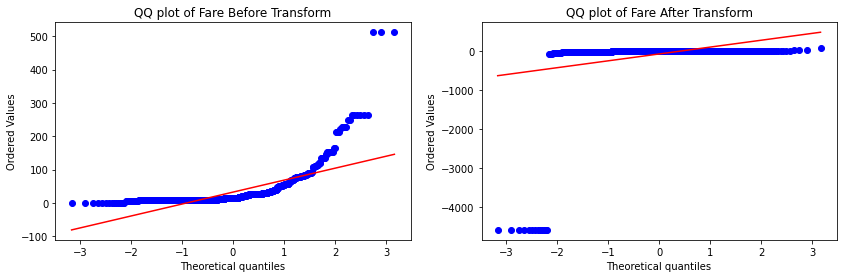

In [28]:
apply_transform(np.tan) #custom transform

# ***Thanks for giving it a read !!***